In [1]:
from __future__ import division, print_function
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.layers.recurrent import LSTM
from tensorflow.python.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import os
import matplotlib.pyplot as plt
os.environ["CUDA_VISIBLE_DEVICES"] = "" 

In [2]:
data = np.load('/home/chase/Boyka/Lyu/fac_cond256_unit8.npz')
raw_X=data['cond']
raw_Y=data['fac'][:,1]
raw_Y=raw_Y.astype(np.float64)
NUM_TIMESTEPS = 65
HIDDEN_SIZE = 10
BATCH_SIZE = 128   
NUM_EPOCHS = 3000
Xtrain=raw_X[:-1000]
Ytrain=raw_Y[:-1000]
Xtest=raw_X[-1000:]
Ytest=raw_Y[-1000:]


In [3]:
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(2000, 65, 1) (1000, 65, 1) (2000,) (1000,)


In [4]:
model = Sequential()
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True,activation='relu'))
model.add(BatchNormalization())
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True,activation='relu'))
model.add(BatchNormalization())
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True,activation='relu'))
model.add(BatchNormalization())
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=True,activation='relu'))
model.add(BatchNormalization())
model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=False,activation='relu'))
model.add(BatchNormalization())
# model.add(Activation('tanh'))
model.add(Dense(1))
model.summary()

model.compile(loss="mean_absolute_error", optimizer="adam", metrics=["mean_absolute_error"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 65, 10)            480       
_________________________________________________________________
batch_normalization (BatchNo (None, 65, 10)            40        
_________________________________________________________________
lstm_1 (LSTM)                (None, 65, 10)            840       
_________________________________________________________________
batch_normalization_1 (Batch (None, 65, 10)            40        
_________________________________________________________________
lstm_2 (LSTM)                (None, 65, 10)            840       
_________________________________________________________________
batch_normalization_2 (Batch (None, 65, 10)            40        
_________________________________________________________________
lstm_3 (LSTM)                (None, 65, 10)            8

In [5]:
history=model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(Xtest, Ytest),shuffle=True)
score, _ = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)
rmse = math.sqrt(score)
model.save('lstm_bn_5000_1.h5')
 

Epoch 1/3000
16/16 [==============================] - 9s 156ms/step - loss: 0.9326 - mean_absolute_error: 0.9326 - val_loss: 0.7906 - val_mean_absolute_error: 0.7906
Epoch 2/3000
16/16 [==============================] - 2s 123ms/step - loss: 0.7591 - mean_absolute_error: 0.7591 - val_loss: 0.7921 - val_mean_absolute_error: 0.7921
Epoch 3/3000
16/16 [==============================] - 2s 130ms/step - loss: 0.7682 - mean_absolute_error: 0.7682 - val_loss: 0.7866 - val_mean_absolute_error: 0.7866
Epoch 4/3000
16/16 [==============================] - 2s 118ms/step - loss: 0.6250 - mean_absolute_error: 0.6250 - val_loss: 0.8139 - val_mean_absolute_error: 0.8139
Epoch 5/3000
16/16 [==============================] - 2s 118ms/step - loss: 0.5310 - mean_absolute_error: 0.5310 - val_loss: 0.8380 - val_mean_absolute_error: 0.8380
Epoch 6/3000
16/16 [==============================] - 2s 117ms/step - loss: 0.4268 - mean_absolute_error: 0.4268 - val_loss: 0.8574 - val_mean_absolute_error: 0.8574
Epoc

16/16 [==============================] - 3s 160ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - val_loss: 0.2256 - val_mean_absolute_error: 0.2256
Epoch 100/3000
16/16 [==============================] - 3s 166ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - val_loss: 0.1930 - val_mean_absolute_error: 0.1930
Epoch 101/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - val_loss: 0.1444 - val_mean_absolute_error: 0.1444
Epoch 102/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - val_loss: 0.1613 - val_mean_absolute_error: 0.1613
Epoch 103/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - val_loss: 0.1480 - val_mean_absolute_error: 0.1480
Epoch 104/3000
16/16 [==============================] - 3s 168ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - val_loss: 0.1235 - val_mean_absolute_error: 0.1235
Epoch 1

Epoch 148/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - val_loss: 1.0847 - val_mean_absolute_error: 1.0847
Epoch 149/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - val_loss: 0.8433 - val_mean_absolute_error: 0.8433
Epoch 150/3000
16/16 [==============================] - 3s 171ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - val_loss: 0.9347 - val_mean_absolute_error: 0.9347
Epoch 151/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - val_loss: 0.8669 - val_mean_absolute_error: 0.8669
Epoch 152/3000
16/16 [==============================] - 3s 169ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - val_loss: 0.7018 - val_mean_absolute_error: 0.7018
Epoch 153/3000
16/16 [==============================] - 3s 169ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - val_loss: 0.7131 - val_mean_absolute_error:

Epoch 197/3000
16/16 [==============================] - 3s 166ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - val_loss: 0.6434 - val_mean_absolute_error: 0.6434
Epoch 198/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - val_loss: 0.7424 - val_mean_absolute_error: 0.7424
Epoch 199/3000
16/16 [==============================] - 3s 166ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - val_loss: 0.8059 - val_mean_absolute_error: 0.8059
Epoch 200/3000
16/16 [==============================] - 3s 165ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - val_loss: 0.6422 - val_mean_absolute_error: 0.6422
Epoch 201/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - val_loss: 0.5444 - val_mean_absolute_error: 0.5444
Epoch 202/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - val_loss: 0.3478 - val_mean_absolute_error:

Epoch 246/3000
16/16 [==============================] - 2s 154ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - val_loss: 0.0355 - val_mean_absolute_error: 0.0355
Epoch 247/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - val_loss: 0.0490 - val_mean_absolute_error: 0.0490
Epoch 248/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - val_loss: 0.0344 - val_mean_absolute_error: 0.0344
Epoch 249/3000
16/16 [==============================] - 3s 165ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - val_loss: 0.0624 - val_mean_absolute_error: 0.0624
Epoch 250/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - val_loss: 0.0685 - val_mean_absolute_error: 0.0685
Epoch 251/3000
16/16 [==============================] - 3s 164ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - val_loss: 0.0113 - val_mean_absolute_error:

Epoch 295/3000
16/16 [==============================] - 3s 164ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - val_loss: 0.0227 - val_mean_absolute_error: 0.0227
Epoch 296/3000
16/16 [==============================] - 3s 173ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - val_loss: 0.0161 - val_mean_absolute_error: 0.0161
Epoch 297/3000
16/16 [==============================] - 3s 165ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - val_loss: 0.0087 - val_mean_absolute_error: 0.0087
Epoch 298/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - val_loss: 0.0173 - val_mean_absolute_error: 0.0173
Epoch 299/3000
16/16 [==============================] - 3s 164ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - val_loss: 0.0319 - val_mean_absolute_error: 0.0319
Epoch 300/3000
16/16 [==============================] - 3s 165ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - val_loss: 0.0059 - val_mean_absolute_error:

Epoch 344/3000
16/16 [==============================] - 3s 171ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - val_loss: 0.0680 - val_mean_absolute_error: 0.0680
Epoch 345/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - val_loss: 0.0196 - val_mean_absolute_error: 0.0196
Epoch 346/3000
16/16 [==============================] - 3s 165ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - val_loss: 0.0867 - val_mean_absolute_error: 0.0867
Epoch 347/3000
16/16 [==============================] - 3s 165ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - val_loss: 0.0203 - val_mean_absolute_error: 0.0203
Epoch 348/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - val_loss: 0.0231 - val_mean_absolute_error: 0.0231
Epoch 349/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - val_loss: 0.0254 - val_mean_absolute_error:

Epoch 393/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - val_loss: 0.0089 - val_mean_absolute_error: 0.0089
Epoch 394/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - val_loss: 0.0688 - val_mean_absolute_error: 0.0688
Epoch 395/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - val_loss: 0.0545 - val_mean_absolute_error: 0.0545
Epoch 396/3000
16/16 [==============================] - 2s 157ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - val_loss: 0.0326 - val_mean_absolute_error: 0.0326
Epoch 397/3000
16/16 [==============================] - 2s 154ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - val_loss: 0.0415 - val_mean_absolute_error: 0.0415
Epoch 398/3000
16/16 [==============================] - 2s 158ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - val_loss: 0.0117 - val_mean_absolute_error:

Epoch 442/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - val_loss: 0.1591 - val_mean_absolute_error: 0.1591
Epoch 443/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - val_loss: 0.1463 - val_mean_absolute_error: 0.1463
Epoch 444/3000
16/16 [==============================] - 3s 166ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - val_loss: 0.0518 - val_mean_absolute_error: 0.0518
Epoch 445/3000
16/16 [==============================] - 3s 165ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104
Epoch 446/3000
16/16 [==============================] - 3s 170ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063
Epoch 447/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - val_loss: 0.0568 - val_mean_absolute_error:

Epoch 491/3000
16/16 [==============================] - 3s 164ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - val_loss: 0.0660 - val_mean_absolute_error: 0.0660
Epoch 492/3000
16/16 [==============================] - 2s 158ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - val_loss: 0.0434 - val_mean_absolute_error: 0.0434
Epoch 493/3000
16/16 [==============================] - 2s 156ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - val_loss: 0.0360 - val_mean_absolute_error: 0.0360
Epoch 494/3000
16/16 [==============================] - 2s 154ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - val_loss: 0.0452 - val_mean_absolute_error: 0.0452
Epoch 495/3000
16/16 [==============================] - 2s 155ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - val_loss: 0.0315 - val_mean_absolute_error: 0.0315
Epoch 496/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - val_loss: 0.0195 - val_mean_absolute_error:

Epoch 540/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - val_loss: 0.0152 - val_mean_absolute_error: 0.0152
Epoch 541/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - val_loss: 0.0019 - val_mean_absolute_error: 0.0019
Epoch 542/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - val_loss: 0.0569 - val_mean_absolute_error: 0.0569
Epoch 543/3000
16/16 [==============================] - 3s 171ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - val_loss: 0.0532 - val_mean_absolute_error: 0.0532
Epoch 544/3000
16/16 [==============================] - 3s 165ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - val_loss: 0.0648 - val_mean_absolute_error: 0.0648
Epoch 545/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - val_loss: 0.0767 - val_mean_absolute_error:

Epoch 589/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - val_loss: 0.0168 - val_mean_absolute_error: 0.0168
Epoch 590/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - val_loss: 0.0048 - val_mean_absolute_error: 0.0048
Epoch 591/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - val_loss: 0.0117 - val_mean_absolute_error: 0.0117
Epoch 592/3000
16/16 [==============================] - 2s 156ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - val_loss: 0.0026 - val_mean_absolute_error: 0.0026
Epoch 593/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - val_loss: 0.0160 - val_mean_absolute_error: 0.0160
Epoch 594/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - val_loss: 0.0404 - val_mean_absolute_error:

Epoch 638/3000
16/16 [==============================] - 2s 156ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - val_loss: 0.1394 - val_mean_absolute_error: 0.1394
Epoch 639/3000
16/16 [==============================] - 3s 175ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - val_loss: 0.0985 - val_mean_absolute_error: 0.0985
Epoch 640/3000
16/16 [==============================] - 3s 186ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - val_loss: 0.0644 - val_mean_absolute_error: 0.0644
Epoch 641/3000
16/16 [==============================] - 3s 188ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - val_loss: 0.1211 - val_mean_absolute_error: 0.1211
Epoch 642/3000
16/16 [==============================] - 3s 171ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - val_loss: 0.0876 - val_mean_absolute_error: 0.0876
Epoch 643/3000
16/16 [==============================] - 3s 165ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - val_loss: 0.0573 - val_mean_absolute_error:

Epoch 687/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - val_loss: 0.0533 - val_mean_absolute_error: 0.0533
Epoch 688/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - val_loss: 0.0131 - val_mean_absolute_error: 0.0131
Epoch 689/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - val_loss: 0.0277 - val_mean_absolute_error: 0.0277
Epoch 690/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - val_loss: 0.0957 - val_mean_absolute_error: 0.0957
Epoch 691/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - val_loss: 0.0516 - val_mean_absolute_error: 0.0516
Epoch 692/3000
16/16 [==============================] - 2s 152ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - val_loss: 0.2977 - val_mean_absolute_error:

Epoch 736/3000
16/16 [==============================] - 2s 155ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - val_loss: 0.1123 - val_mean_absolute_error: 0.1123
Epoch 737/3000
16/16 [==============================] - 3s 169ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - val_loss: 0.0939 - val_mean_absolute_error: 0.0939
Epoch 738/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - val_loss: 0.0376 - val_mean_absolute_error: 0.0376
Epoch 739/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - val_loss: 0.0346 - val_mean_absolute_error: 0.0346
Epoch 740/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - val_loss: 0.0142 - val_mean_absolute_error: 0.0142
Epoch 741/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - val_loss: 0.0359 - val_mean_absolute_error:

Epoch 785/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - val_loss: 0.0249 - val_mean_absolute_error: 0.0249
Epoch 786/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - val_loss: 0.0052 - val_mean_absolute_error: 0.0052
Epoch 787/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - val_loss: 0.0131 - val_mean_absolute_error: 0.0131
Epoch 788/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - val_loss: 0.0218 - val_mean_absolute_error: 0.0218
Epoch 789/3000
16/16 [==============================] - 3s 164ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - val_loss: 0.0554 - val_mean_absolute_error: 0.0554
Epoch 790/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - val_loss: 0.0145 - val_mean_absolute_error:

Epoch 834/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - val_loss: 0.0302 - val_mean_absolute_error: 0.0302
Epoch 835/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - val_loss: 0.0191 - val_mean_absolute_error: 0.0191
Epoch 836/3000
16/16 [==============================] - 3s 166ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - val_loss: 0.0312 - val_mean_absolute_error: 0.0312
Epoch 837/3000
16/16 [==============================] - 2s 157ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - val_loss: 0.0562 - val_mean_absolute_error: 0.0562
Epoch 838/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - val_loss: 4.5383 - val_mean_absolute_error: 4.5383
Epoch 839/3000
16/16 [==============================] - 3s 164ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - val_loss: 2.7794 - val_mean_absolute_error:

Epoch 883/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - val_loss: 0.4089 - val_mean_absolute_error: 0.4089
Epoch 884/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - val_loss: 0.3789 - val_mean_absolute_error: 0.3789
Epoch 885/3000
16/16 [==============================] - 3s 164ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - val_loss: 0.3846 - val_mean_absolute_error: 0.3846
Epoch 886/3000
16/16 [==============================] - 3s 165ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - val_loss: 0.3484 - val_mean_absolute_error: 0.3484
Epoch 887/3000
16/16 [==============================] - 3s 183ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - val_loss: 0.3284 - val_mean_absolute_error: 0.3284
Epoch 888/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - val_loss: 0.2959 - val_mean_absolute_error:

Epoch 932/3000
16/16 [==============================] - 2s 157ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - val_loss: 0.1687 - val_mean_absolute_error: 0.1687
Epoch 933/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - val_loss: 0.1868 - val_mean_absolute_error: 0.1868
Epoch 934/3000
16/16 [==============================] - 2s 155ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - val_loss: 0.2011 - val_mean_absolute_error: 0.2011
Epoch 935/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - val_loss: 0.0206 - val_mean_absolute_error: 0.0206
Epoch 936/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - val_loss: 0.0467 - val_mean_absolute_error: 0.0467
Epoch 937/3000
16/16 [==============================] - 3s 157ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - val_loss: 0.0747 - val_mean_absolute_error:

Epoch 981/3000
16/16 [==============================] - 3s 164ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - val_loss: 0.2102 - val_mean_absolute_error: 0.2102
Epoch 982/3000
16/16 [==============================] - 3s 166ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - val_loss: 0.2680 - val_mean_absolute_error: 0.2680
Epoch 983/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - val_loss: 0.4358 - val_mean_absolute_error: 0.4358
Epoch 984/3000
16/16 [==============================] - 3s 165ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - val_loss: 0.1690 - val_mean_absolute_error: 0.1690
Epoch 985/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - val_loss: 0.1917 - val_mean_absolute_error: 0.1917
Epoch 986/3000
16/16 [==============================] - 2s 153ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - val_loss: 0.0203 - val_mean_absolute_error:

16/16 [==============================] - 3s 162ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - val_loss: 0.0045 - val_mean_absolute_error: 0.0045
Epoch 1078/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - val_loss: 0.0961 - val_mean_absolute_error: 0.0961
Epoch 1079/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - val_loss: 0.1380 - val_mean_absolute_error: 0.1380
Epoch 1080/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - val_loss: 0.0779 - val_mean_absolute_error: 0.0779
Epoch 1081/3000
16/16 [==============================] - 2s 156ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - val_loss: 0.1642 - val_mean_absolute_error: 0.1642
Epoch 1082/3000
16/16 [==============================] - 2s 154ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - val_loss: 0.1139 - val_mean_absolute_error: 0.1139
Ep

16/16 [==============================] - 3s 161ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - val_loss: 0.1000 - val_mean_absolute_error: 0.1000
Epoch 1174/3000
16/16 [==============================] - 3s 165ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - val_loss: 0.0726 - val_mean_absolute_error: 0.0726
Epoch 1175/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - val_loss: 0.2302 - val_mean_absolute_error: 0.2302
Epoch 1176/3000
16/16 [==============================] - 3s 164ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - val_loss: 0.0719 - val_mean_absolute_error: 0.0719
Epoch 1177/3000
16/16 [==============================] - 2s 151ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - val_loss: 0.0904 - val_mean_absolute_error: 0.0904
Epoch 1178/3000
16/16 [==============================] - 2s 154ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - val_loss: 0.2845 - val_mean_absolute_error: 0.2845
Ep

16/16 [==============================] - 3s 159ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - val_loss: 0.2529 - val_mean_absolute_error: 0.2529
Epoch 1270/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - val_loss: 0.1792 - val_mean_absolute_error: 0.1792
Epoch 1271/3000
16/16 [==============================] - 2s 157ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - val_loss: 0.2765 - val_mean_absolute_error: 0.2765
Epoch 1272/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - val_loss: 0.2494 - val_mean_absolute_error: 0.2494
Epoch 1273/3000
16/16 [==============================] - 2s 156ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - val_loss: 0.7040 - val_mean_absolute_error: 0.7040
Epoch 1274/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - val_loss: 0.4291 - val_mean_absolute_error: 0.4291
Ep

16/16 [==============================] - 3s 161ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122
Epoch 1366/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - val_loss: 0.3110 - val_mean_absolute_error: 0.3110
Epoch 1367/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - val_loss: 0.6310 - val_mean_absolute_error: 0.6310
Epoch 1368/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - val_loss: 0.1374 - val_mean_absolute_error: 0.1374
Epoch 1369/3000
16/16 [==============================] - 3s 167ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - val_loss: 0.0371 - val_mean_absolute_error: 0.0371
Epoch 1370/3000
16/16 [==============================] - 3s 157ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - val_loss: 0.0203 - val_mean_absolute_error: 0.0203
Ep

16/16 [==============================] - 3s 158ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - val_loss: 0.3116 - val_mean_absolute_error: 0.3116
Epoch 1462/3000
16/16 [==============================] - 3s 166ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - val_loss: 0.1754 - val_mean_absolute_error: 0.1754
Epoch 1463/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - val_loss: 0.0320 - val_mean_absolute_error: 0.0320
Epoch 1464/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - val_loss: 0.0272 - val_mean_absolute_error: 0.0272
Epoch 1465/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - val_loss: 0.0471 - val_mean_absolute_error: 0.0471
Epoch 1466/3000
16/16 [==============================] - 2s 157ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - val_loss: 0.1521 - val_mean_absolute_error: 0.1521
Ep

16/16 [==============================] - 3s 163ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - val_loss: 0.3005 - val_mean_absolute_error: 0.3005
Epoch 1558/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - val_loss: 0.1663 - val_mean_absolute_error: 0.1663
Epoch 1559/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - val_loss: 0.0023 - val_mean_absolute_error: 0.0023
Epoch 1560/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - val_loss: 0.1202 - val_mean_absolute_error: 0.1202
Epoch 1561/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - val_loss: 0.0901 - val_mean_absolute_error: 0.0901
Epoch 1562/3000
16/16 [==============================] - 3s 157ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - val_loss: 0.0860 - val_mean_absolute_error: 0.0860
Ep

16/16 [==============================] - 3s 158ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - val_loss: 0.1094 - val_mean_absolute_error: 0.1094
Epoch 1654/3000
16/16 [==============================] - 3s 167ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - val_loss: 0.4528 - val_mean_absolute_error: 0.4528
Epoch 1655/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - val_loss: 0.1956 - val_mean_absolute_error: 0.1956
Epoch 1656/3000
16/16 [==============================] - 3s 166ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - val_loss: 0.1164 - val_mean_absolute_error: 0.1164
Epoch 1657/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - val_loss: 0.1213 - val_mean_absolute_error: 0.1213
Epoch 1658/3000
16/16 [==============================] - 3s 170ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - val_loss: 0.1401 - val_mean_absolute_error: 0.1401
Ep

16/16 [==============================] - 3s 161ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - val_loss: 0.2564 - val_mean_absolute_error: 0.2564
Epoch 1750/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080
Epoch 1751/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - val_loss: 0.2805 - val_mean_absolute_error: 0.2805
Epoch 1752/3000
16/16 [==============================] - 3s 165ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - val_loss: 0.0850 - val_mean_absolute_error: 0.0850
Epoch 1753/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - val_loss: 0.2011 - val_mean_absolute_error: 0.2011
Epoch 1754/3000
16/16 [==============================] - 3s 164ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - val_loss: 0.0355 - val_mean_absolute_error: 0.0355
Ep

16/16 [==============================] - 3s 162ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - val_loss: 0.0630 - val_mean_absolute_error: 0.0630
Epoch 1846/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096
Epoch 1847/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - val_loss: 0.4732 - val_mean_absolute_error: 0.4732
Epoch 1848/3000
16/16 [==============================] - 3s 164ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - val_loss: 0.3736 - val_mean_absolute_error: 0.3736
Epoch 1849/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - val_loss: 0.4239 - val_mean_absolute_error: 0.4239
Epoch 1850/3000
16/16 [==============================] - 2s 156ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - val_loss: 0.3397 - val_mean_absolute_error: 0.3397
Ep

16/16 [==============================] - 3s 162ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - val_loss: 0.2518 - val_mean_absolute_error: 0.2518
Epoch 1942/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - val_loss: 0.0151 - val_mean_absolute_error: 0.0151
Epoch 1943/3000
16/16 [==============================] - 3s 157ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - val_loss: 0.0916 - val_mean_absolute_error: 0.0916
Epoch 1944/3000
16/16 [==============================] - 3s 166ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - val_loss: 0.0183 - val_mean_absolute_error: 0.0183
Epoch 1945/3000
16/16 [==============================] - 2s 155ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - val_loss: 0.1451 - val_mean_absolute_error: 0.1451
Epoch 1946/3000
16/16 [==============================] - 3s 166ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - val_loss: 0.3111 - val_mean_absolute_error: 0.3111
Ep

16/16 [==============================] - 3s 159ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - val_loss: 0.5125 - val_mean_absolute_error: 0.5125
Epoch 2038/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - val_loss: 0.2668 - val_mean_absolute_error: 0.2668
Epoch 2039/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - val_loss: 0.1404 - val_mean_absolute_error: 0.1404
Epoch 2040/3000
16/16 [==============================] - 3s 164ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - val_loss: 0.1151 - val_mean_absolute_error: 0.1151
Epoch 2041/3000
16/16 [==============================] - 3s 165ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - val_loss: 0.0016 - val_mean_absolute_error: 0.0016
Epoch 2042/3000
16/16 [==============================] - 2s 157ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - val_loss: 0.1844 - val_mean_absolute_error: 0.1844
Ep

16/16 [==============================] - 3s 159ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - val_loss: 0.1499 - val_mean_absolute_error: 0.1499
Epoch 2134/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123
Epoch 2135/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - val_loss: 0.0030 - val_mean_absolute_error: 0.0030
Epoch 2136/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - val_loss: 0.0981 - val_mean_absolute_error: 0.0981
Epoch 2137/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - val_loss: 0.1790 - val_mean_absolute_error: 0.1790
Epoch 2138/3000
16/16 [==============================] - 3s 165ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - val_loss: 0.6316 - val_mean_absolute_error: 0.6316
Ep

16/16 [==============================] - 2s 156ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - val_loss: 0.1949 - val_mean_absolute_error: 0.1949
Epoch 2230/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - val_loss: 0.0978 - val_mean_absolute_error: 0.0978
Epoch 2231/3000
16/16 [==============================] - 3s 156ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - val_loss: 0.0471 - val_mean_absolute_error: 0.0471
Epoch 2232/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - val_loss: 0.0152 - val_mean_absolute_error: 0.0152
Epoch 2233/3000
16/16 [==============================] - 2s 156ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - val_loss: 0.4517 - val_mean_absolute_error: 0.4517
Epoch 2234/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - val_loss: 0.3059 - val_mean_absolute_error: 0.3059
Ep

16/16 [==============================] - 3s 163ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - val_loss: 0.3865 - val_mean_absolute_error: 0.3865
Epoch 2326/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - val_loss: 0.1919 - val_mean_absolute_error: 0.1919
Epoch 2327/3000
16/16 [==============================] - 2s 151ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - val_loss: 0.1238 - val_mean_absolute_error: 0.1238
Epoch 2328/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - val_loss: 0.1953 - val_mean_absolute_error: 0.1953
Epoch 2329/3000
16/16 [==============================] - 3s 161ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - val_loss: 0.1921 - val_mean_absolute_error: 0.1921
Epoch 2330/3000
16/16 [==============================] - 3s 166ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - val_loss: 0.1114 - val_mean_absolute_error: 0.1114
Ep

16/16 [==============================] - 3s 164ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - val_loss: 0.0410 - val_mean_absolute_error: 0.0410
Epoch 2422/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - val_loss: 0.2869 - val_mean_absolute_error: 0.2869
Epoch 2423/3000
16/16 [==============================] - 2s 156ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - val_loss: 0.4575 - val_mean_absolute_error: 0.4575
Epoch 2424/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - val_loss: 0.5014 - val_mean_absolute_error: 0.5014
Epoch 2425/3000
16/16 [==============================] - 3s 171ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - val_loss: 0.2558 - val_mean_absolute_error: 0.2558
Epoch 2426/3000
16/16 [==============================] - 3s 162ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - val_loss: 0.2940 - val_mean_absolute_error: 0.2940
Ep

16/16 [==============================] - 3s 163ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - val_loss: 0.1051 - val_mean_absolute_error: 0.1051
Epoch 2518/3000
16/16 [==============================] - 3s 168ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - val_loss: 0.1508 - val_mean_absolute_error: 0.1508
Epoch 2519/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - val_loss: 0.1543 - val_mean_absolute_error: 0.1543
Epoch 2520/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - val_loss: 0.1407 - val_mean_absolute_error: 0.1407
Epoch 2521/3000
16/16 [==============================] - 3s 167ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - val_loss: 0.2322 - val_mean_absolute_error: 0.2322
Epoch 2522/3000
16/16 [==============================] - 2s 156ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - val_loss: 0.2486 - val_mean_absolute_error: 0.2486
Ep

16/16 [==============================] - 3s 158ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - val_loss: 0.3486 - val_mean_absolute_error: 0.3486
Epoch 2614/3000
16/16 [==============================] - 2s 156ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - val_loss: 0.0856 - val_mean_absolute_error: 0.0856
Epoch 2615/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - val_loss: 0.1592 - val_mean_absolute_error: 0.1592
Epoch 2616/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - val_loss: 0.1163 - val_mean_absolute_error: 0.1163
Epoch 2617/3000
16/16 [==============================] - 2s 158ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - val_loss: 0.3615 - val_mean_absolute_error: 0.3615
Epoch 2618/3000
16/16 [==============================] - 3s 163ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - val_loss: 0.4064 - val_mean_absolute_error: 0.4064
Ep

16/16 [==============================] - 3s 161ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - val_loss: 0.0535 - val_mean_absolute_error: 0.0535
Epoch 2710/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - val_loss: 0.0347 - val_mean_absolute_error: 0.0347
Epoch 2711/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - val_loss: 0.0363 - val_mean_absolute_error: 0.0363
Epoch 2712/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - val_loss: 0.0491 - val_mean_absolute_error: 0.0491
Epoch 2713/3000
16/16 [==============================] - 3s 157ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - val_loss: 0.0415 - val_mean_absolute_error: 0.0415
Epoch 2714/3000
16/16 [==============================] - 2s 158ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - val_loss: 0.0847 - val_mean_absolute_error: 0.0847
Ep

16/16 [==============================] - 3s 161ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - val_loss: 0.0054 - val_mean_absolute_error: 0.0054
Epoch 2806/3000
16/16 [==============================] - 2s 158ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - val_loss: 0.0149 - val_mean_absolute_error: 0.0149
Epoch 2807/3000
16/16 [==============================] - 3s 158ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - val_loss: 0.0315 - val_mean_absolute_error: 0.0315
Epoch 2808/3000
16/16 [==============================] - 2s 156ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - val_loss: 0.0129 - val_mean_absolute_error: 0.0129
Epoch 2809/3000
16/16 [==============================] - 3s 165ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - val_loss: 0.0034 - val_mean_absolute_error: 0.0034
Epoch 2810/3000
16/16 [==============================] - 3s 159ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - val_loss: 0.0160 - val_mean_absolute_error: 0.0160
Ep

16/16 [==============================] - 3s 162ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - val_loss: 0.0963 - val_mean_absolute_error: 0.0963
Epoch 2902/3000
16/16 [==============================] - 2s 157ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - val_loss: 0.0429 - val_mean_absolute_error: 0.0429
Epoch 2903/3000
16/16 [==============================] - 2s 156ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - val_loss: 0.0536 - val_mean_absolute_error: 0.0536
Epoch 2904/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - val_loss: 0.0385 - val_mean_absolute_error: 0.0385
Epoch 2905/3000
16/16 [==============================] - 3s 160ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - val_loss: 0.0875 - val_mean_absolute_error: 0.0875
Epoch 2906/3000
16/16 [==============================] - 2s 156ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - val_loss: 0.0834 - val_mean_absolute_error: 0.0834
Ep

16/16 [==============================] - 2s 111ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - val_loss: 0.0215 - val_mean_absolute_error: 0.0215
Epoch 2998/3000
16/16 [==============================] - 2s 111ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - val_loss: 0.0439 - val_mean_absolute_error: 0.0439
Epoch 2999/3000
16/16 [==============================] - 2s 112ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - val_loss: 0.0524 - val_mean_absolute_error: 0.0524
Epoch 3000/3000
8/8 [==============================] - 0s 19ms/step - loss: 0.0944 - mean_absolute_error: 0.0944


In [7]:
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))
print(history.history.keys())
mean_absolute_error = history.history['mean_absolute_error']
val_mean_absolute_error = history.history['val_mean_absolute_error']


MSE: 0.094, RMSE: 0.307
dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


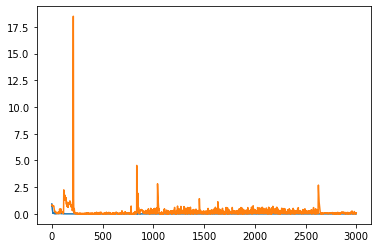

In [8]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_absolute_error)),mean_absolute_error,label='train')
ax.plot(range(len(val_mean_absolute_error)),val_mean_absolute_error,label='val')

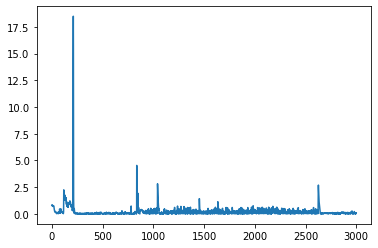

In [9]:
ax = plt.figure().add_subplot()
ax.plot(range(len(val_mean_absolute_error)),val_mean_absolute_error,label='val')

In [10]:
pre = model.predict(Xtest, batch_size=BATCH_SIZE)
print(pre)

[[0.72672784]
 [0.68237853]
 [0.719656  ]
 [0.67597437]
 [0.71304905]
 [0.66926926]
 [0.70621794]
 [0.7440428 ]
 [0.6993555 ]
 [0.7373431 ]
 [0.6926167 ]
 [0.73043007]
 [0.68612707]
 [0.7235553 ]
 [0.6797104 ]
 [0.71658546]
 [0.67297643]
 [0.7098193 ]
 [0.6670235 ]
 [0.70311296]
 [0.7407145 ]
 [0.6961485 ]
 [0.7336481 ]
 [0.6898402 ]
 [0.7273326 ]
 [0.6831066 ]
 [0.7202223 ]
 [0.6765029 ]
 [0.71355563]
 [0.67044985]
 [0.7066951 ]
 [0.74438304]
 [0.700157  ]
 [0.73806566]
 [0.69344664]
 [0.73088217]
 [0.6869107 ]
 [0.72400403]
 [0.6803664 ]
 [0.7170998 ]
 [0.67378855]
 [0.7106044 ]
 [0.6674483 ]
 [0.7033702 ]
 [0.740882  ]
 [0.69721943]
 [0.73476887]
 [0.69047064]
 [0.72800183]
 [0.6844122 ]
 [0.72099423]
 [0.6766708 ]
 [0.71442044]
 [0.6708195 ]
 [0.70729494]
 [0.7458658 ]
 [0.7008705 ]
 [0.7384328 ]
 [0.69471216]
 [0.73167354]
 [0.68729603]
 [0.72486174]
 [0.68085676]
 [0.7179027 ]
 [0.67425686]
 [0.7109439 ]
 [0.66768825]
 [0.7043073 ]
 [0.74225533]
 [0.69746447]
 [0.7354758 ]
 [0.69

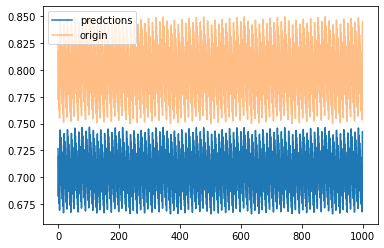

In [12]:
plt.figure()
plt.plot(pre,label='predctions',alpha=1)
plt.plot(Ytest,label='origin',alpha=0.5)
plt.legend(['predctions','origin'])


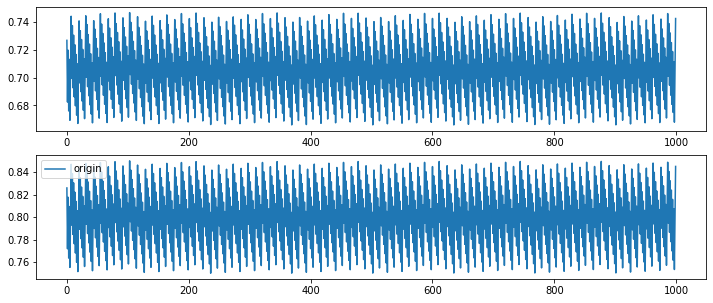

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(pre,label='predctions')
plt.subplot(212)
plt.plot(Ytest,label='origin')
plt.legend()
plt.show()